In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
import cufflinks as cf
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
init_notebook_mode(connected=True)

In [3]:
cf.go_offline()

In [4]:
train=pd.read_csv("train.csv")

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
#I know that there are 891 rows and let's see which columns have missing value
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
train["Cabin"].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

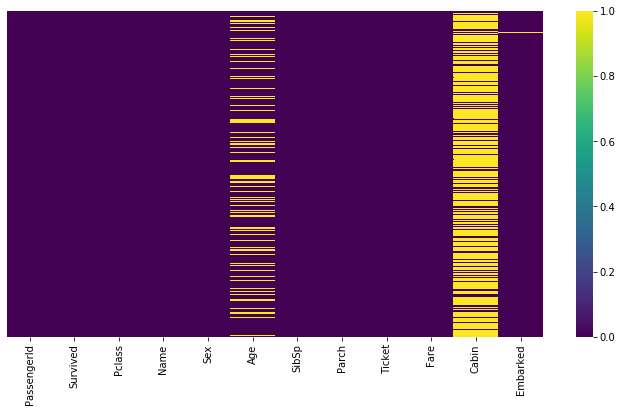

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),yticklabels=0,cmap="viridis")

<font size=5 color="red">Age, Cabin have missing values

Text(0.5, 1.0, 'Survivors based on Sex')

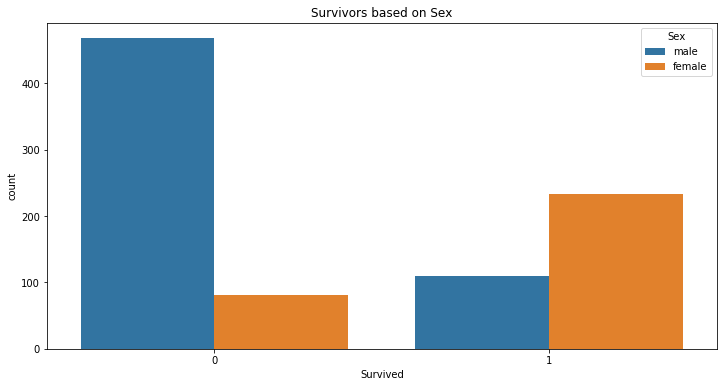

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(train["Survived"],data=train,hue="Sex")
plt.title("Survivors based on Sex")

In [11]:
pd.crosstab(train["Sex"],train["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [12]:
#There are more female survivors and let's see the age average of survived males
male_alive=train[(train["Survived"]==1)&(train["Sex"]=="male")]["Age"].mean()
male_dead=train[(train["Survived"]==0)&(train["Sex"]=="male")]["Age"].mean()
female_alive=train[(train["Survived"]==1)&(train["Sex"]=="female")]["Age"].mean()
female_dead=train[(train["Survived"]==0)&(train["Sex"]=="female")]["Age"].mean()

print("Alive Men Average Age:",male_alive)
print("Dead Men Average Age:",male_dead)
print("Alive Women Average Age:",female_alive)
print("Dead Women Average Age:",female_dead)

#there wasn't many children that were survived. 

Alive Men Average Age: 27.276021505376345
Dead Men Average Age: 31.618055555555557
Alive Women Average Age: 28.84771573604061
Dead Women Average Age: 25.046875


In [13]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survivors based on Class')

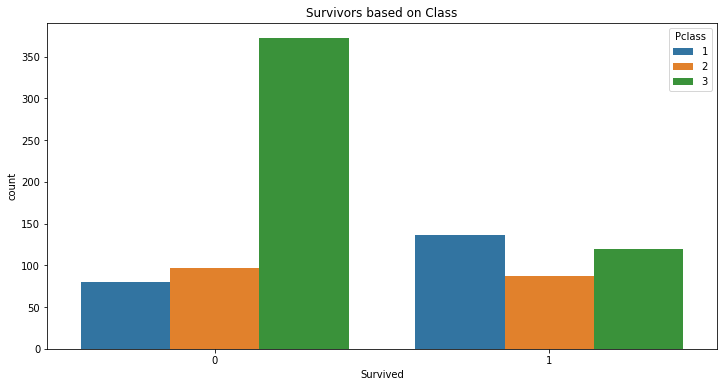

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(train["Survived"],data=train,hue="Pclass")
plt.title("Survivors based on Class")

In [15]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
train[train["Survived"]==1]["Pclass"].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

<br><br>

<font size=3 >From 3rd class <strong>136</strong> people survives out of <strong>491</strong> <br>
<font size=3 >From 2nd class <strong>87</strong> people survives out of <strong>184</strong><br>
<font size=3 >From 1st class <strong>136</strong> people survives out of <strong>216 </strong>
    
Always get 1st class lol 

In [17]:
pd.crosstab(train["Pclass"],train["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0.5, 1.0, 'How Many People Had Spouse or Relative')

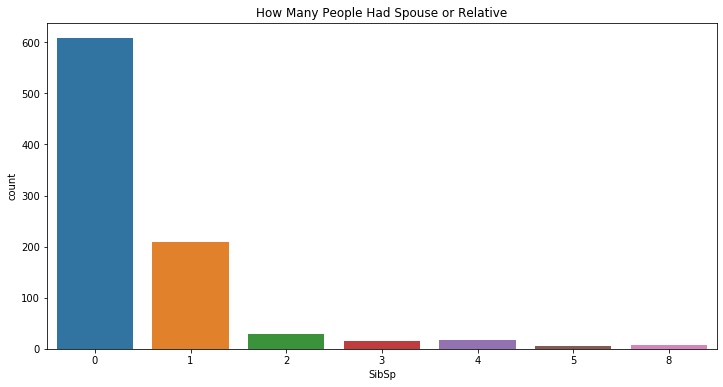

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(train["SibSp"],data=train)
plt.title("How Many People Had Spouse or Relative")
#This Analysis shows shows that most of the people were alone on the ship.

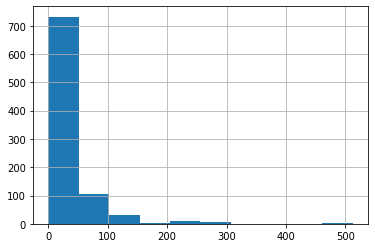

In [19]:
train["Fare"].hist()

I don't like this plot cause it is hard to read

In [20]:
train["Fare"].iplot(kind="hist",title='Purchases Range',xTitle='Price',yTitle='Count',)

In [21]:
mean_first=train[train["Pclass"]==1]["Age"].mean()
mean_second=train[train["Pclass"]==2]["Age"].mean()
mean_third=train[train["Pclass"]==3]["Age"].mean()

print("1st class average age is",mean_first)
print("2nd class average age is",mean_second)
print("3rd class average age is",mean_third)

1st class average age is 38.233440860215055
2nd class average age is 29.87763005780347
3rd class average age is 25.14061971830986


In [22]:
# Filling the Missing Age Data
def fill_age(item):
    age=item[0]
    pclass=item[1]
    
    if pd.isnull(age):
        if pclass==1:
            return mean_first
        elif pclass==2:
            return mean_second
        else:
            return mean_third
    else:
        return age

In [23]:
train["Age"]=train[["Age","Pclass"]].apply(fill_age,axis=1)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<br>
<font size=5 color="red">Missing age values were filled based on the classes' average age. 

## Cleaning Missing Values

In [25]:
#There are so many missing cabin values, so I will drop them
train.drop("Cabin",axis=1,inplace=True)

In [26]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


In [27]:
#still have 2 missing Embarked data. I am not sure about dropping it 
#or fillin with the one that has the most typical value

#I will go with filling it. Let's find the most typical answer
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
#most likely it will be S. 

train["Embarked"].fillna("S",inplace=True)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


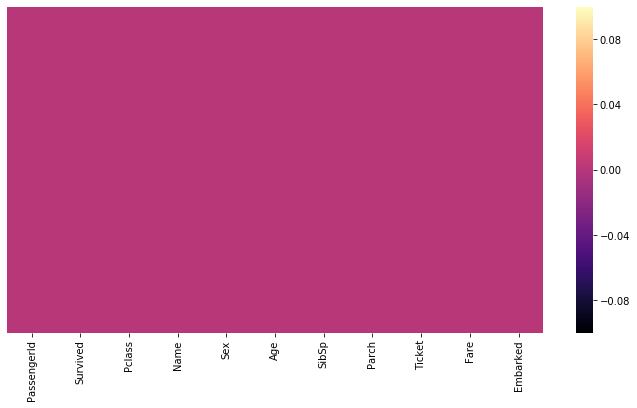

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),yticklabels=0,cmap="magma")

No missing value point anymore. 

## Taking Care of Catergorical Columns

In [31]:
sex=pd.get_dummies(train["Sex"],drop_first=True)

In [32]:
embark=pd.get_dummies(train["Embarked"],drop_first=True)

In [33]:
train=pd.concat([train,sex,embark],axis=1)

In [34]:
train.drop(["Sex","Embarked","Name","Ticket","PassengerId"],axis=1,inplace=True)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,1
887,1,1,19.00000,0,0,30.0000,0,0,1
888,0,3,25.14062,1,2,23.4500,0,0,1
889,1,1,26.00000,0,0,30.0000,1,0,0


## Machine Learning

In [35]:
X=train.drop("Survived",axis=1)
y=train["Survived"]

In [36]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.00000,1,0,7.2500,1,0,1
1,1,38.00000,1,0,71.2833,0,0,0
2,3,26.00000,0,0,7.9250,0,0,1
3,1,35.00000,1,0,53.1000,0,0,1
4,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.00000,0,0,13.0000,1,0,1
887,1,19.00000,0,0,30.0000,0,0,1
888,3,25.14062,1,2,23.4500,0,0,1
889,1,26.00000,0,0,30.0000,1,0,0


In [37]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)

In [39]:
log_reg=LogisticRegression(solver='lbfgs',max_iter=1000)

In [40]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
predictions=log_reg.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       180
           1       0.82      0.70      0.75       132

    accuracy                           0.81       312
   macro avg       0.81      0.79      0.80       312
weighted avg       0.81      0.81      0.80       312



In [44]:
confusion_matrix(y_test,predictions)

array([[160,  20],
       [ 40,  92]])

In [45]:
test=pd.read_csv("test.csv")

In [46]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
